In [1]:
import pandas as pd
import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
train = pd.read_csv('train.csv')
train.head()

,Id,DetectedCamera,AngleOfSign,SignAspectRatio,SignWidth,SignHeight,SignFacing (Target)
0,2c9180975a056a64015a1e0a52e57021,Rear,195,1.02,46,45,Rear
1,2c9180975a056a64015a1e17b32171e4,Rear,203,1.09,59,54,Rear
2,2c9180975a056a64015a1de4deb16bd5,Front,26,0.96,104,108,Front
3,2c9180975a056a64015a1de4deb16bdd,Rear,199,0.81,38,47,Rear
4,2c9180975a056a64015a1de4deb16bd6,Rear,208,0.93,54,58,Rear


In [4]:
df1 = train[(train['AngleOfSign']>=0) & (train['AngleOfSign']<=41)]

In [5]:
df1['DetectedCamera'].value_counts()

Front    9551
Right       1
Name: DetectedCamera, dtype: int64

In [6]:
df2 = train[(train['AngleOfSign']>41) & (train['AngleOfSign']<=131)]

In [7]:
df2['DetectedCamera'].value_counts()

Right    10463
Front      818
Rear         5
Name: DetectedCamera, dtype: int64

In [8]:
df3 = train[(train['AngleOfSign']>131) & (train['AngleOfSign']<=225)]

In [9]:
df3['DetectedCamera'].value_counts()

Rear     7034
Left      298
Right      52
Name: DetectedCamera, dtype: int64

In [10]:
def update_angle(x):
    if(x>=0 and x<=41):
        return 'Front'
    elif(x>41 and x<=131):
        return 'Right'
    elif(x>131 and x<=225):
        return 'Rear'
    else:
        return 'Left'

In [11]:
train['Angle_direction'] = train['AngleOfSign'].apply(lambda x:update_angle(x))

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()

In [14]:
train['Angle_direction'] = le.fit_transform(train['Angle_direction'])

In [15]:
le.classes_

array(['Front', 'Left', 'Rear', 'Right'], dtype=object)

In [16]:
train.head()

,Id,DetectedCamera,AngleOfSign,SignAspectRatio,SignWidth,SignHeight,SignFacing (Target),Angle_direction
0,2c9180975a056a64015a1e0a52e57021,Rear,195,1.02,46,45,Rear,2
1,2c9180975a056a64015a1e17b32171e4,Rear,203,1.09,59,54,Rear,2
2,2c9180975a056a64015a1de4deb16bd5,Front,26,0.96,104,108,Front,0
3,2c9180975a056a64015a1de4deb16bdd,Rear,199,0.81,38,47,Rear,2
4,2c9180975a056a64015a1de4deb16bd6,Rear,208,0.93,54,58,Rear,2


In [17]:
train.to_csv('updated_train.csv',index=False)

In [18]:
l = LabelEncoder()

In [19]:
l.fit(train['DetectedCamera'])
train['DetectedCamera'] = l.transform(train['DetectedCamera'])

In [20]:
train.head()

,Id,DetectedCamera,AngleOfSign,SignAspectRatio,SignWidth,SignHeight,SignFacing (Target),Angle_direction
0,2c9180975a056a64015a1e0a52e57021,2,195,1.02,46,45,Rear,2
1,2c9180975a056a64015a1e17b32171e4,2,203,1.09,59,54,Rear,2
2,2c9180975a056a64015a1de4deb16bd5,0,26,0.96,104,108,Front,0
3,2c9180975a056a64015a1de4deb16bdd,2,199,0.81,38,47,Rear,2
4,2c9180975a056a64015a1de4deb16bd6,2,208,0.93,54,58,Rear,2


In [21]:
train['SignFacing (Target)'] = l.transform(train['SignFacing (Target)'])

In [22]:
train.head()

,Id,DetectedCamera,AngleOfSign,SignAspectRatio,SignWidth,SignHeight,SignFacing (Target),Angle_direction
0,2c9180975a056a64015a1e0a52e57021,2,195,1.02,46,45,2,2
1,2c9180975a056a64015a1e17b32171e4,2,203,1.09,59,54,2,2
2,2c9180975a056a64015a1de4deb16bd5,0,26,0.96,104,108,0,0
3,2c9180975a056a64015a1de4deb16bdd,2,199,0.81,38,47,2,2
4,2c9180975a056a64015a1de4deb16bd6,2,208,0.93,54,58,2,2


In [23]:
test = pd.read_csv('test.csv')
test.info()
test['DetectedCamera'] = l.transform(test['DetectedCamera'])
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31485 entries, 0 to 31484
Data columns (total 6 columns):
Id                 31485 non-null object
DetectedCamera     31485 non-null object
AngleOfSign        31485 non-null int64
SignAspectRatio    31485 non-null float64
SignWidth          31485 non-null int64
SignHeight         31485 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 1.4+ MB


,Id,DetectedCamera,AngleOfSign,SignAspectRatio,SignWidth,SignHeight
0,2c9180975a056a64015a1e10d3f270fe,3,67,0.63,107,169
1,2c9180975a056a64015a1de4deb16bdc,0,16,0.88,61,69
2,2c9180975a056a64015a1e0e70ea70ce,3,44,1.15,232,202
3,2c9180975a056a64015a1dfed0c46ec6,3,50,1.10,137,125
4,2c9180975a056a64015a1dfed0c46ec7,0,30,0.95,99,104


In [24]:
test['Angle_direction'] = test['AngleOfSign'].apply(lambda x:update_angle(x))

In [25]:
test['Angle_direction'] = le.fit_transform(test['Angle_direction'])

In [26]:
train.columns

Index(['Id', 'DetectedCamera', 'AngleOfSign', 'SignAspectRatio', 'SignWidth',
       'SignHeight', 'SignFacing (Target)', 'Angle_direction'],
      dtype='object')

In [27]:
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-6.3.0-posix-seh-rt_v5-rev1\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from xgboost.sklearn import XGBClassifier

In [28]:
features =  ['DetectedCamera', 'AngleOfSign', 'SignAspectRatio', 'SignWidth',
       'SignHeight', 'Angle_direction']

In [29]:
xgb = XGBClassifier( learning_rate =0.01, n_estimators=1000, max_depth=3,
min_child_weight=5, gamma=0, subsample=0.55, colsample_bytree=0.75,reg_alpha=0.1,
objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27)

In [30]:
X = train[features]
y = train['SignFacing (Target)']

In [31]:
xgb.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.75, gamma=0, learning_rate=0.01,
       max_delta_step=0, max_depth=3, min_child_weight=5, missing=None,
       n_estimators=1000, nthread=4, objective='multi:softprob',
       reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, seed=27,
       silent=True, subsample=0.55)

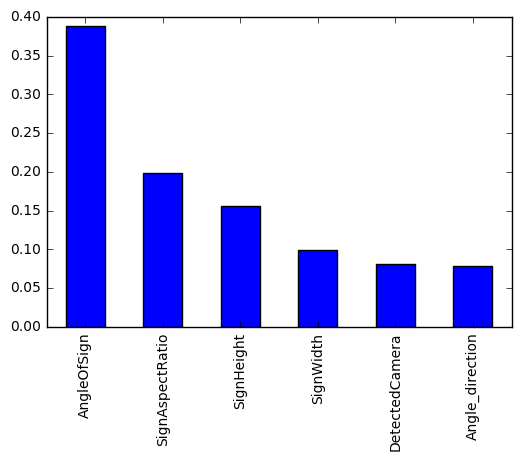

In [32]:
col = ['DetectedCamera', 'AngleOfSign', 'SignAspectRatio', 'SignWidth',
       'SignHeight', 'Angle_direction']
imp = xgb.feature_importances_
s = pd.Series(dict(zip(col,imp)))
s = s.sort_values(ascending=False)
s.plot(kind='bar')

In [33]:
probxgb = xgb.predict_proba(test[features])
submission = pd.DataFrame(data=probxgb,index = test.Id,columns=['Front','Left','Rear','Right'])
submission.head()

,Front,Left,Rear,Right
Id,,,,
2c9180975a056a64015a1e10d3f270fe,0.994444,0.000294,0.001965,0.003298
2c9180975a056a64015a1de4deb16bdc,0.996081,0.001864,0.000323,0.001732
2c9180975a056a64015a1e0e70ea70ce,0.995752,0.000230,0.001464,0.002554
2c9180975a056a64015a1dfed0c46ec6,0.995249,0.000268,0.001310,0.003173
2c9180975a056a64015a1dfed0c46ec7,0.997581,0.000794,0.000267,0.001358


In [35]:
submission.to_csv('xgb.csv')

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf = RandomForestClassifier(n_estimators=1000, max_depth=9,min_samples_split=30,
                            min_samples_leaf=2,n_jobs=-1,random_state=111,oob_score=True)
rf.fit(train[features],train['SignFacing (Target)'])
probrf = rf.predict_proba(test[features])
submission = pd.DataFrame(data=probrf,index = test.Id,columns=['Front','Left','Rear','Right'])
submission.head()

,Front,Left,Rear,Right
Id,,,,
2c9180975a056a64015a1e10d3f270fe,0.995857,0.000014,0.001728,0.002401
2c9180975a056a64015a1de4deb16bdc,0.997971,0.000493,0.000019,0.001517
2c9180975a056a64015a1e0e70ea70ce,0.995031,0.000023,0.001610,0.003336
2c9180975a056a64015a1dfed0c46ec6,0.995043,0.000025,0.001525,0.003408
2c9180975a056a64015a1dfed0c46ec7,0.998749,0.000541,0.000039,0.000671


In [41]:
submission.to_csv('rfr.csv')